In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
def zscore(x):
    mu = np.mean(x,axis = 0)
    sigma = np.std(x,axis = 0)
    x_norm = (x - mu)/sigma
    return x_norm
def R2_score(x,y,w,b):
    y_pred = np.dot(x,w)  + b
    ssr = (y  - y_pred)**2
    ssr = np.sum(ssr)
    mu = np.mean(y)
    sst = (y - mu)**2
    sst =np.sum(sst)
    R2 = 1 - (ssr/sst)
    return R2
def predict(x,w,b):
    y_pred = np.dot(x,w) + b
    return y_pred

In [3]:
def cost_gradient(x,y,w,b):
    m = x.shape[0]
    n = len(w)
    d = (np.dot(x,w) + b) - y
    e = d.reshape(-1,1)
    e = x*e
    e = np.sum(e,axis = 0)
    dj_dw = e
    dj_db = np.sum(d)
    d = d**2
    cost = np.sum(d)
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    cost = cost/(2*m)
    return cost,dj_dw,dj_db

In [4]:
def descent(x,y,w_in,b_in,alpha,iteration,cost_gradientf):
    w = w_in
    b = b_in
    j_history = []
    for i in range(iteration):
        cost,dj_dw,dj_db = cost_gradientf(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        j_history.append(cost)
        if (i)%(1) == 0:
            print(f"iteration={i},cost={j_history[-1]}")
    return w,b,j_history

In [5]:
dataset = pd.read_csv("linear_train.csv")
dataset_1 = pd.read_csv("linear_test_data.csv")

In [6]:
x_train = dataset.iloc[:,1:21].values
y_train = dataset.iloc[:,21:22].values
y_train = y_train.flatten()
x_train = zscore(x_train)

In [7]:
alpha = 0.5
iteration = 20
w_in = np.zeros(20)
b_in = 0
w,b,j_history = descent(x_train,y_train,w_in,b_in,alpha,iteration,cost_gradient)
print(w,b)

iteration=0,cost=30357.23198081161
iteration=1,cost=10380.617300727448
iteration=2,cost=6180.503273674733
iteration=3,cost=5124.934253971739
iteration=4,cost=4859.301519003613
iteration=5,cost=4792.368043118527
iteration=6,cost=4775.480420324174
iteration=7,cost=4771.214107954446
iteration=8,cost=4770.134936281292
iteration=9,cost=4769.861613318927
iteration=10,cost=4769.792302257581
iteration=11,cost=4769.7747043009995
iteration=12,cost=4769.770230806323
iteration=13,cost=4769.769092267896
iteration=14,cost=4769.768802162994
iteration=15,cost=4769.768728158337
iteration=16,cost=4769.768709258886
iteration=17,cost=4769.768704427022
iteration=18,cost=4769.76870319038
iteration=19,cost=4769.76870287355
[72.99688659 66.24899461 97.44240147  1.7177811  17.36332781 24.81611219
 71.23325793 30.99555347 20.3504487  93.74911511 39.36884726 37.25516801
  2.82784333 40.70115092 40.70115092 46.08718818 21.51569541 33.84603632
 33.68439108 39.24757745] -0.3656503862194398


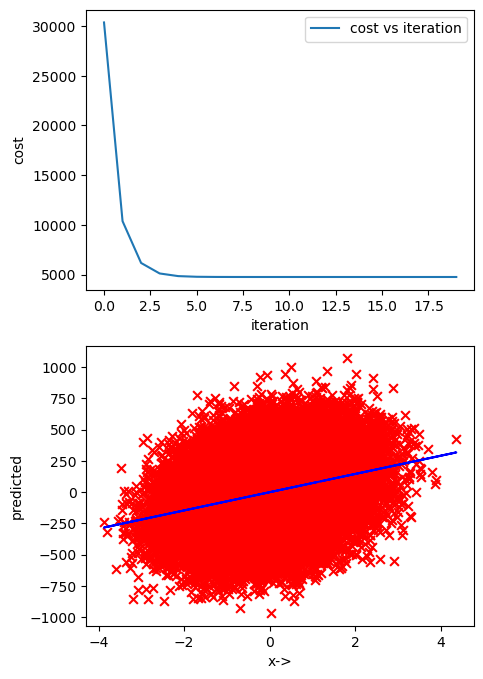

In [25]:
x = x_train[:,1:2].flatten()
w_1 = w[0]
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (5,8))
ax1.plot(j_history[:20],label = 'cost vs iteration')
ax2.scatter(x,y_train,marker = 'x',c = 'red',s = 40,label = 'actual')
ax2.plot(x,x*w_1 + b,c = 'blue',label = 'predicted')
ax1.set_ylabel('cost')
ax1.set_xlabel('iteration')
ax2.set_ylabel('predicted')
ax2.set_xlabel('x->')
ax1.legend()
ax1.legend()
plt.show()

In [19]:
y_pred = predict(x_train,w,b)

In [20]:
r2 = R2_score(x_train,y_train,w,b)

In [21]:
print(r2)

0.8428783227196911
